In [5]:
import requests
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
# from tabulate import tabulate

url_standings = "https://api.football-data.org/v4/competitions/PL/standings"
url_scorers = "https://api.football-data.org/v4/competitions/PL/scorers"


headers ={"X-Auth-Token": "f27778fe0b5d451cbfe654ba74ede45f"}
response_standings = requests.get(url_standings, headers=headers)
response_scorers = requests.get(url_scorers, headers=headers)




In [6]:
# Error checking
if response_standings.status_code == 200:
    data_standings = response_standings.json()
else:
    print("Error fetching standings:", response_standings.status_code, response_standings.text)

if response_scorers.status_code == 200:
    data_scorers = response_scorers.json()
else:
    print("Error fetching scorers:", response_scorers.status_code, response_scorers.text)

In [7]:
# converting the data_standings into a dataframe

Epl_table = pandas.DataFrame(data_standings['standings'][0]['table'])

# print the first few  rows of the Epl_table
Epl_table.head()

,position,team,playedGames,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference
0,1,"{'id': 64, 'name': 'Liverpool FC', 'shortName'...",29,None,21,7,1,70,69,27,42
1,2,"{'id': 57, 'name': 'Arsenal FC', 'shortName': ...",29,None,16,10,3,58,53,24,29
2,3,"{'id': 351, 'name': 'Nottingham Forest FC', 's...",29,None,16,6,7,54,49,35,14
3,4,"{'id': 61, 'name': 'Chelsea FC', 'shortName': ...",29,None,14,7,8,49,53,37,16
4,5,"{'id': 65, 'name': 'Manchester City FC', 'shor...",29,None,14,6,9,48,55,40,15


In [8]:
 # converting the data_scorers into a dataframe
Epl_top_scorers= pandas.DataFrame(data_scorers['scorers'])
Epl_top_scorers

,player,team,playedMatches,goals,assists,penalties
0,"{'id': 3754, 'name': 'Mohamed Salah', 'firstNa...","{'id': 64, 'name': 'Liverpool FC', 'shortName'...",29,27,16,9.0
1,"{'id': 38101, 'name': 'Erling Haaland', 'first...","{'id': 65, 'name': 'Manchester City FC', 'shor...",28,21,3,2.0
2,"{'id': 6486, 'name': 'Alexander Isak', 'firstN...","{'id': 67, 'name': 'Newcastle United FC', 'sho...",25,19,5,2.0
3,"{'id': 8057, 'name': 'Chris Wood', 'firstName'...","{'id': 351, 'name': 'Nottingham Forest FC', 's...",29,18,3,3.0
4,"{'id': 8626, 'name': 'Bryan Mbeumo', 'firstNam...","{'id': 402, 'name': 'Brentford FC', 'shortName...",29,15,5,4.0
5,"{'id': 144892, 'name': 'Cole Palmer', 'firstNa...","{'id': 61, 'name': 'Chelsea FC', 'shortName': ...",28,14,6,3.0
6,"{'id': 612, 'name': 'Yoane Wissa', 'firstName'...","{'id': 402, 'name': 'Brentford FC', 'shortName...",26,13,2,NaN
7,"{'id': 30842, 'name': 'Matheus Cunha', 'firstN...","{'id': 76, 'name': 'Wolverhampton Wanderers FC...",26,13,5,NaN
8,"{'id': 4444, 'name': 'Ollie Watkins', 'firstNa...","{'id': 58, 'name': 'Aston Villa FC', 'shortNam...",29,13,5,2.0
9,"{'id': 641, 'name': 'Jean-Philippe Mateta', 'f...","{'id': 354, 'name': 'Crystal Palace FC', 'shor...",27,12,2,2.0


In [9]:


# Extract team names and points
teams = [team['team']['name'] for team in data_standings['standings'][0]['table']]
points = [team['points'] for team in data_standings['standings'][0]['table']]



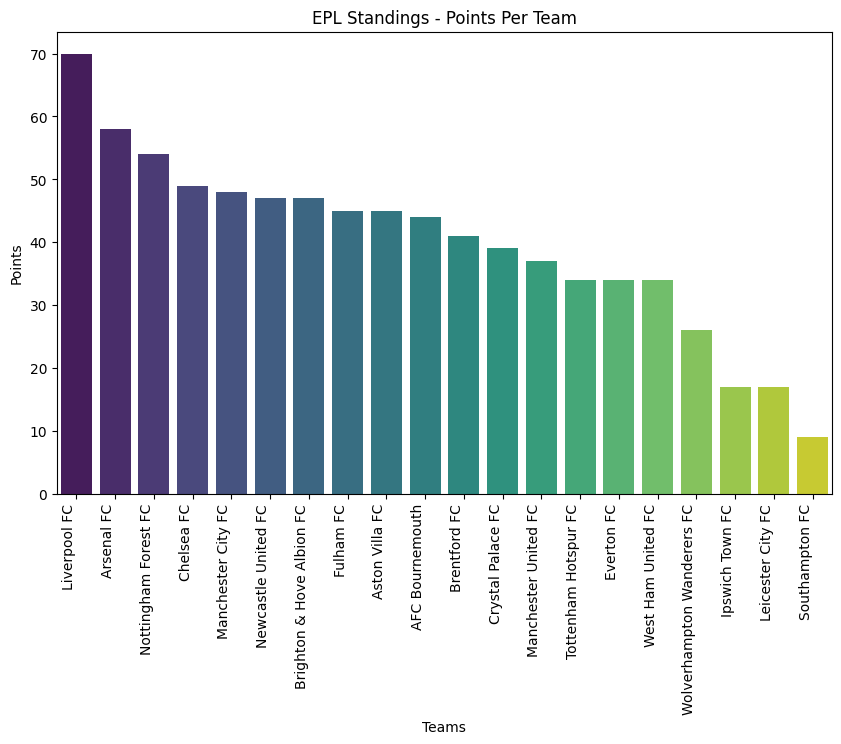

In [16]:

# Epl table visualised as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=teams, y=points, hue=teams, palette="viridis")

plt.xlabel("Teams")
plt.ylabel("Points")
plt.xticks(rotation=90, ha="right")
plt.title("EPL Standings - Points Per Team")
plt.show()

In [11]:


# Extracting data
goals_for = [team['goalsFor'] for team in data_standings['standings'][0]['table']]
goals_against = [team['goalsAgainst'] for team in data_standings['standings'][0]['table']]



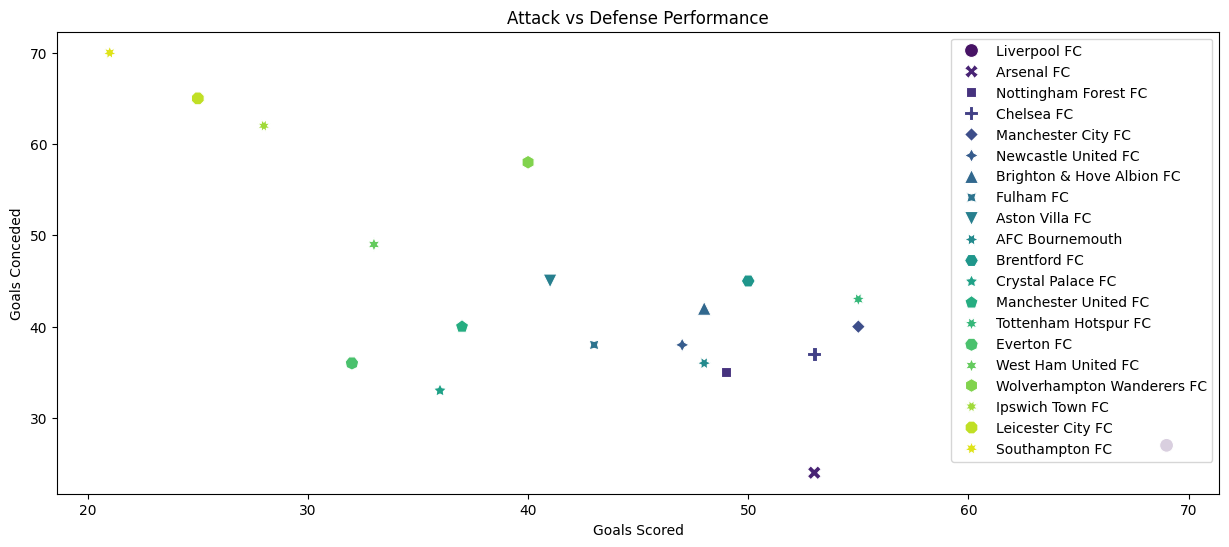

In [12]:
# scatterplot showing how teams are faring in attacking and defending
plt.figure(figsize=(15, 6))
sns.scatterplot(x=goals_for, y=goals_against, hue=teams, style=teams, s=100, palette="viridis")
plt.xlabel("Goals Scored")
plt.ylabel("Goals Conceded")
plt.title("Attack vs Defense Performance")
plt.show()

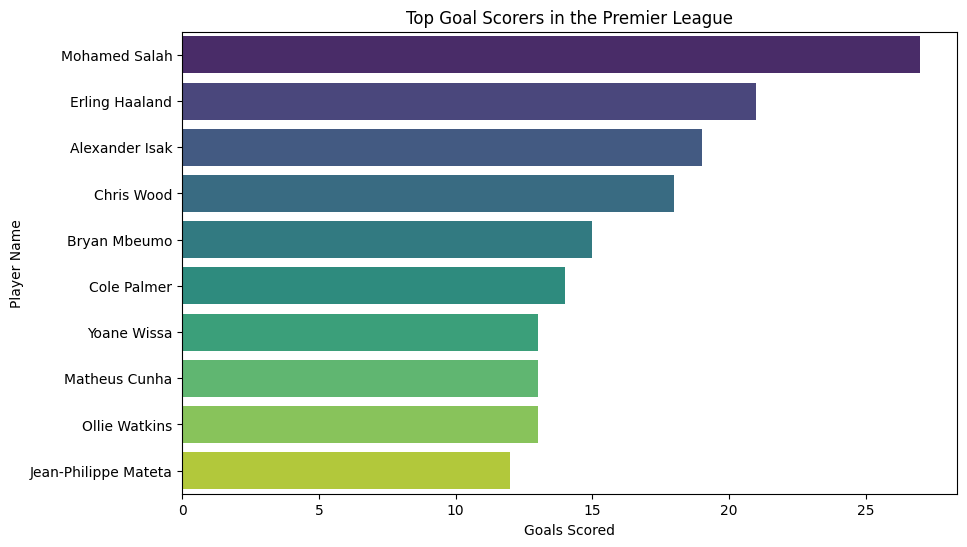

In [13]:

# Extract player names and goals
players = [scorer['player']['name'] for scorer in data_scorers['scorers']]
goals = [scorer['goals'] for scorer in data_scorers['scorers']]

# A bar chart of top  scorers against goals scored
plt.figure(figsize=(10, 6))
sns.barplot(x=goals, y=players,hue=players, palette="viridis")

plt.xlabel("Goals Scored")
plt.ylabel("Player Name")
plt.title("Top Goal Scorers in the Premier League")
plt.show()


In [17]:
# pie_chart showing percentage goal contribution among the top scorers
# plt.figure(figsize=(8, 8))
# plt.pie(goals, labels=players, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(players)))
# plt.title("Goal Contribution by Top Scorers")
# plt.show()

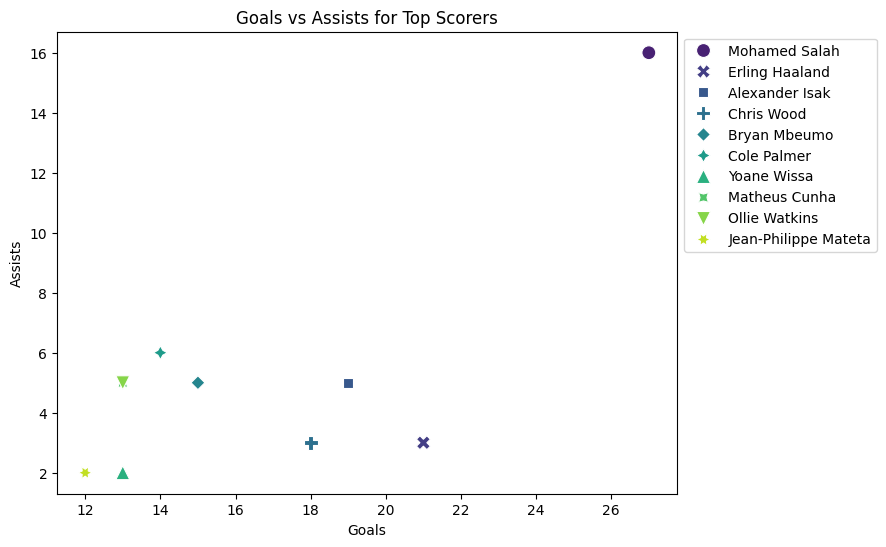

In [15]:
assists = [scorer['assists'] for scorer in data_scorers['scorers']] 
 
# scatter plot of assists against goal scored by the top scorers 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=goals, y=assists,hue=players, style=players, palette="viridis", s=100)
plt.xlabel("Goals")
plt.ylabel("Assists")
plt.title("Goals vs Assists for Top Scorers")
plt.legend(bbox_to_anchor=(1,1))
plt.show()
